## ML Projects ##
1. Linear Regression
2. Decision Tree Regressor
3. Lasso Regression
4. KNN Regressor
5. RandomForestRegressor
6. Xgboost Regressor
7. Hyperparameter Tuning
8. ANN - Artificial Neural Network

In [1]:
#Import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [4]:
#load dataframe
df = pd.read_csv('Real_Combine.csv')

In [5]:
df.isnull().sum() #PM 2.5 has 1 missing values

T         0
TM        0
Tm        0
SLP       0
H         0
W         0
V         0
VM        0
PM 2.5    1
dtype: int64

<Axes: >

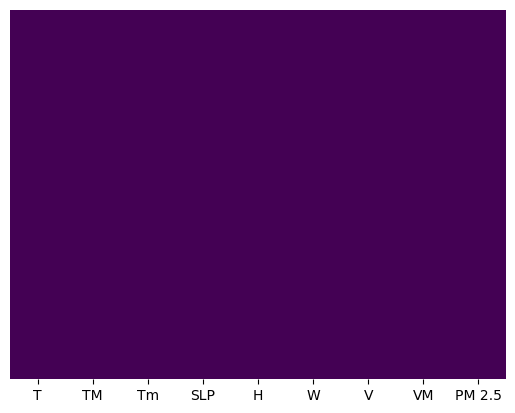

In [6]:
#check fpr null values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
#drop the null values
df = df.dropna()

In [8]:
#Divide the data into independent and dependent features
X = df.iloc[:,:-1] #independent features
y = df.iloc[:,-1] #dependent feature

In [9]:
#Check null values in X:
X.isnull().sum() #no null values in X

T      0
TM     0
Tm     0
SLP    0
H      0
W      0
V      0
VM     0
dtype: int64

In [10]:
y.isnull().sum() #no null values in y

0

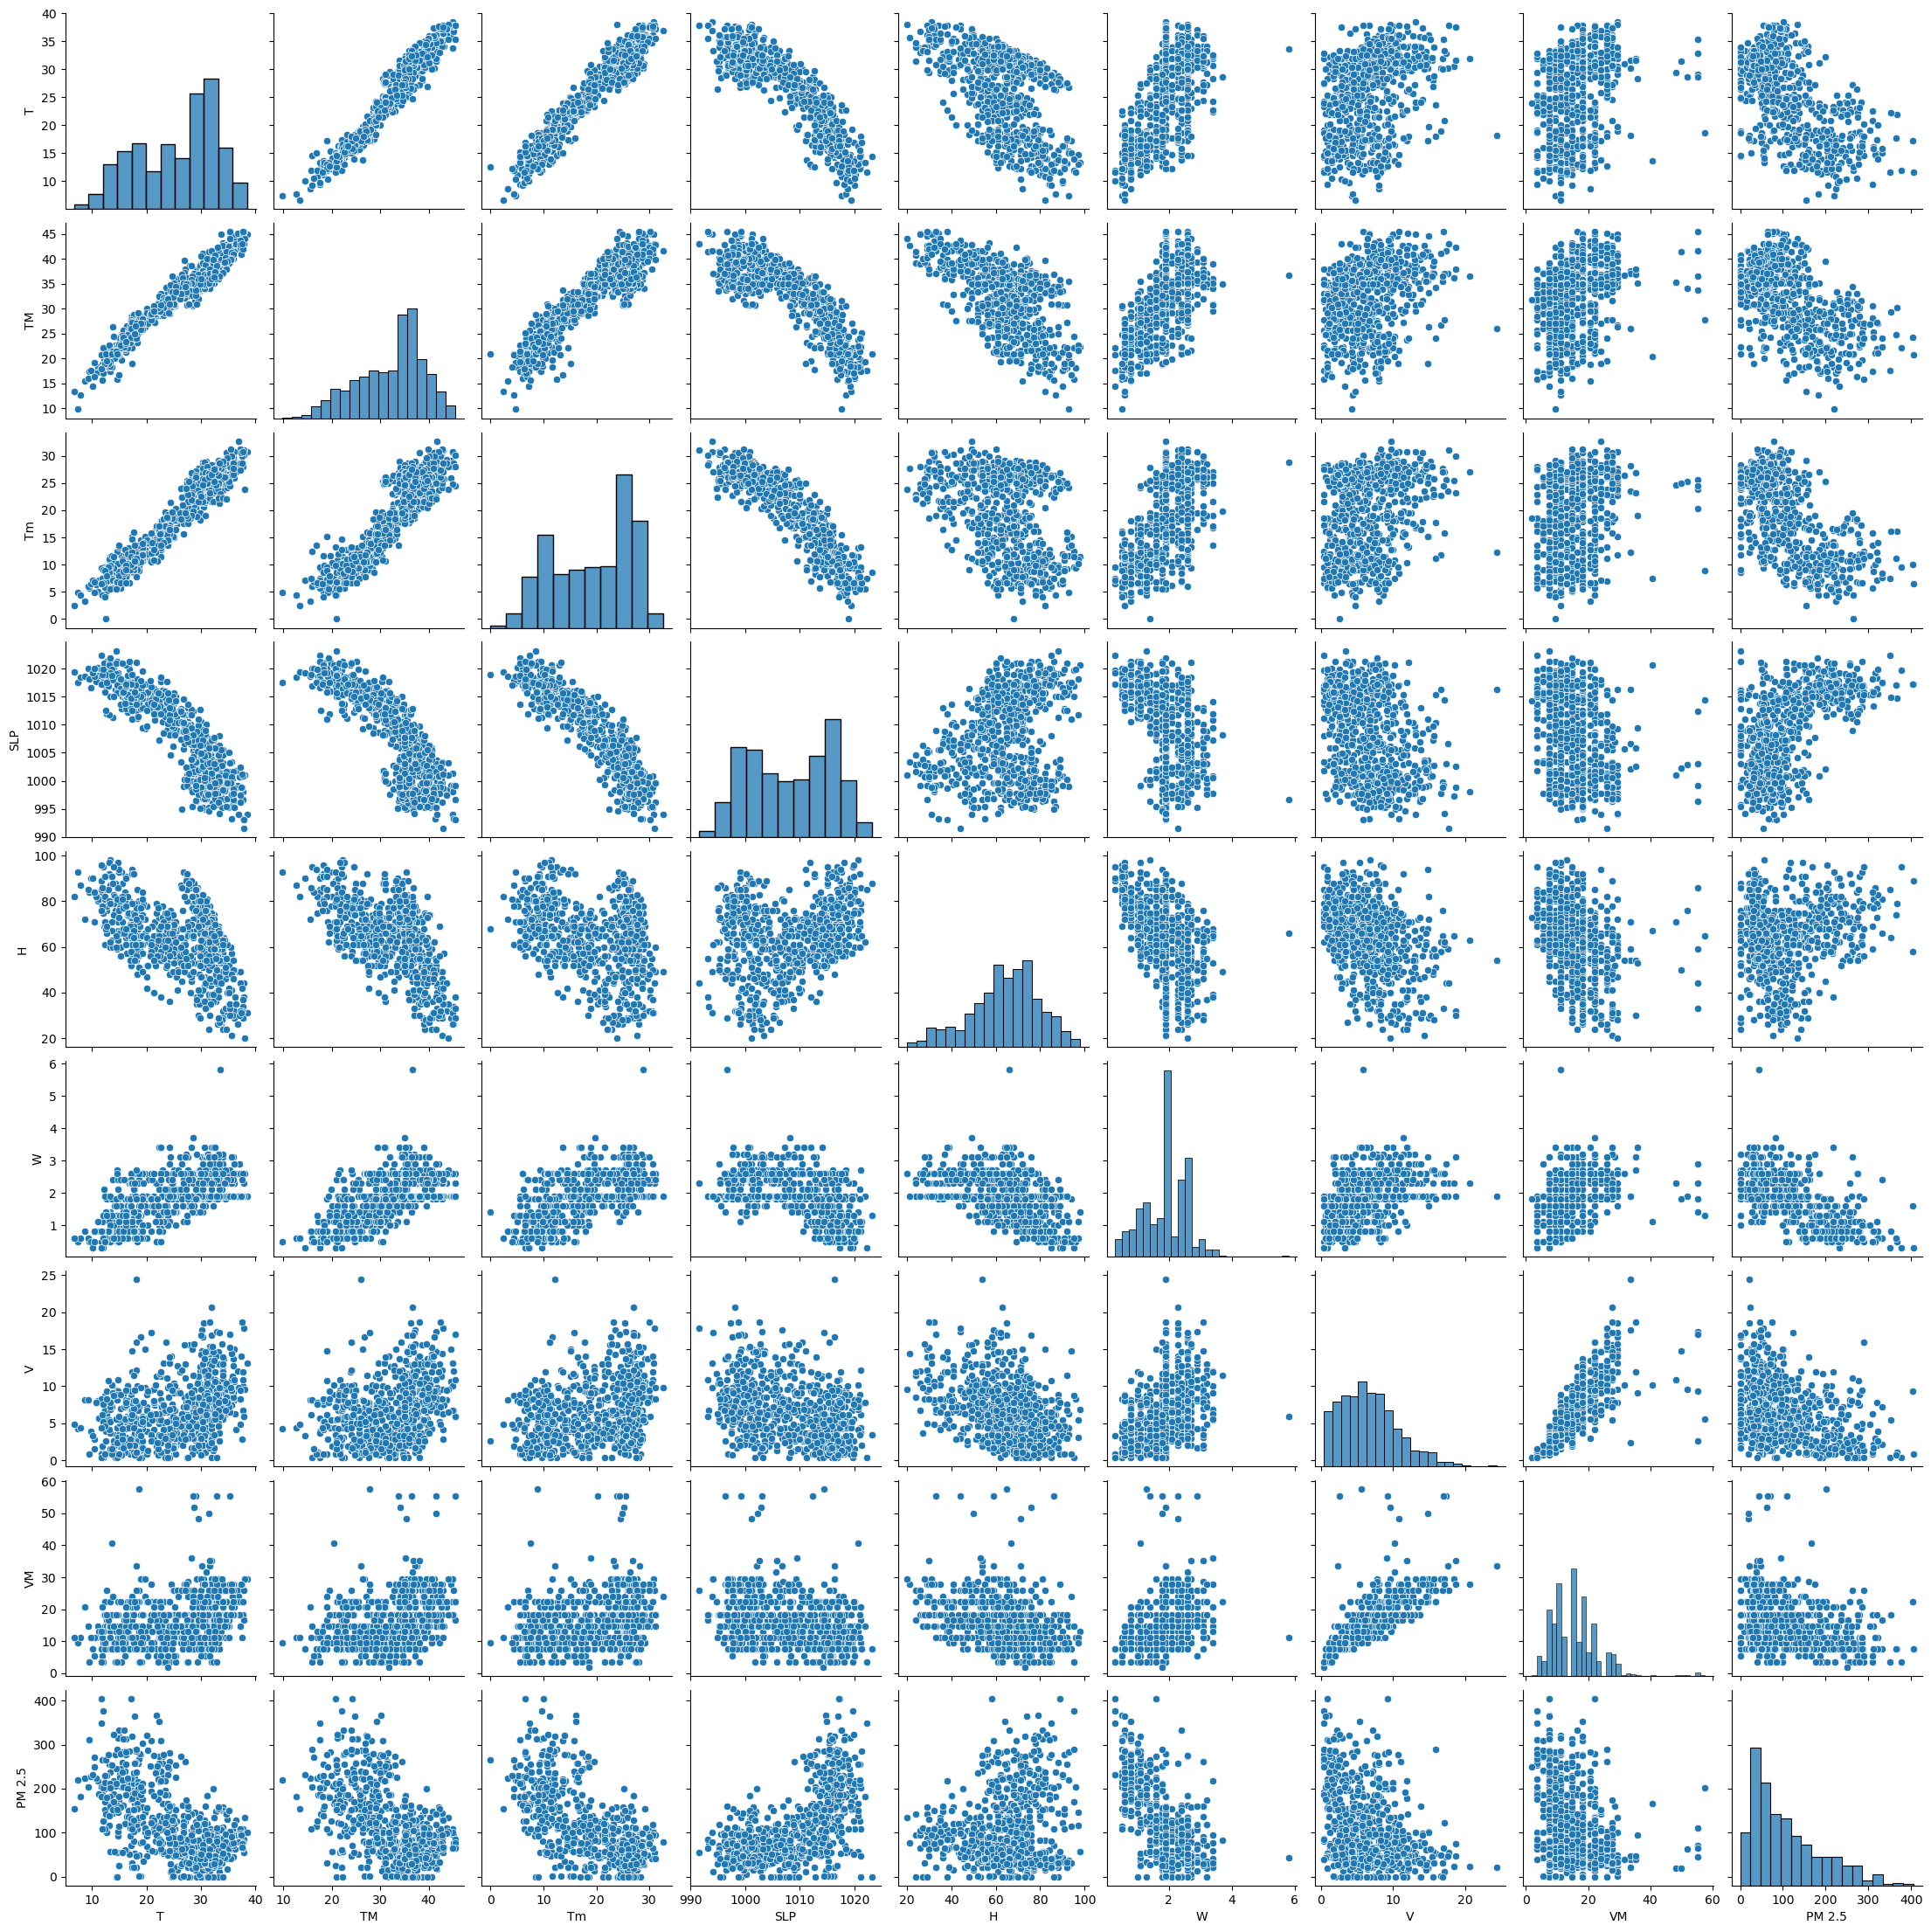

In [11]:
#Multivariate analysis using pairplot, comparing all features among each other
sns.pairplot(df)

In [12]:
#We dont have any set pattern with PM 2.5 and other features, so linear regression algorithm will not be the best choice
df.corr()

,T,TM,Tm,SLP,H,W,V,VM,PM 2.5
T,1.000000,0.967276,0.958892,-0.884383,-0.518870,0.622637,0.326067,0.287138,-0.628336
TM,0.967276,1.000000,0.896699,-0.829254,-0.599629,0.598479,0.320116,0.299508,-0.569381
Tm,0.958892,0.896699,1.000000,-0.909514,-0.315305,0.560299,0.312904,0.259431,-0.669059
SLP,-0.884383,-0.829254,-0.909514,1.000000,0.274196,-0.491842,-0.346130,-0.299830,0.615615
H,-0.518870,-0.599629,-0.315305,0.274196,1.000000,-0.475279,-0.399079,-0.370981,0.174658
W,0.622637,0.598479,0.560299,-0.491842,-0.475279,1.000000,0.402884,0.347493,-0.628621
V,0.326067,0.320116,0.312904,-0.346130,-0.399079,0.402884,1.000000,0.760777,-0.354799
VM,0.287138,0.299508,0.259431,-0.299830,-0.370981,0.347493,0.760777,1.000000,-0.283695
PM 2.5,-0.628336,-0.569381,-0.669059,0.615615,0.174658,-0.628621,-0.354799,-0.283695,1.000000


## Correlation Matrix with Heatmap ##
The correlation refers to how the features are related to each other or the target variable. It can either be positive (wherein an increase in the value of one feature increases the value of the target variable) or negative (increase in the value of one feature decreases the value of the target variable).

The heatmap is a tool that helps us identify which features are the most related to the target variable. We will plot the heatmap using the seabirn library.

<Axes: >

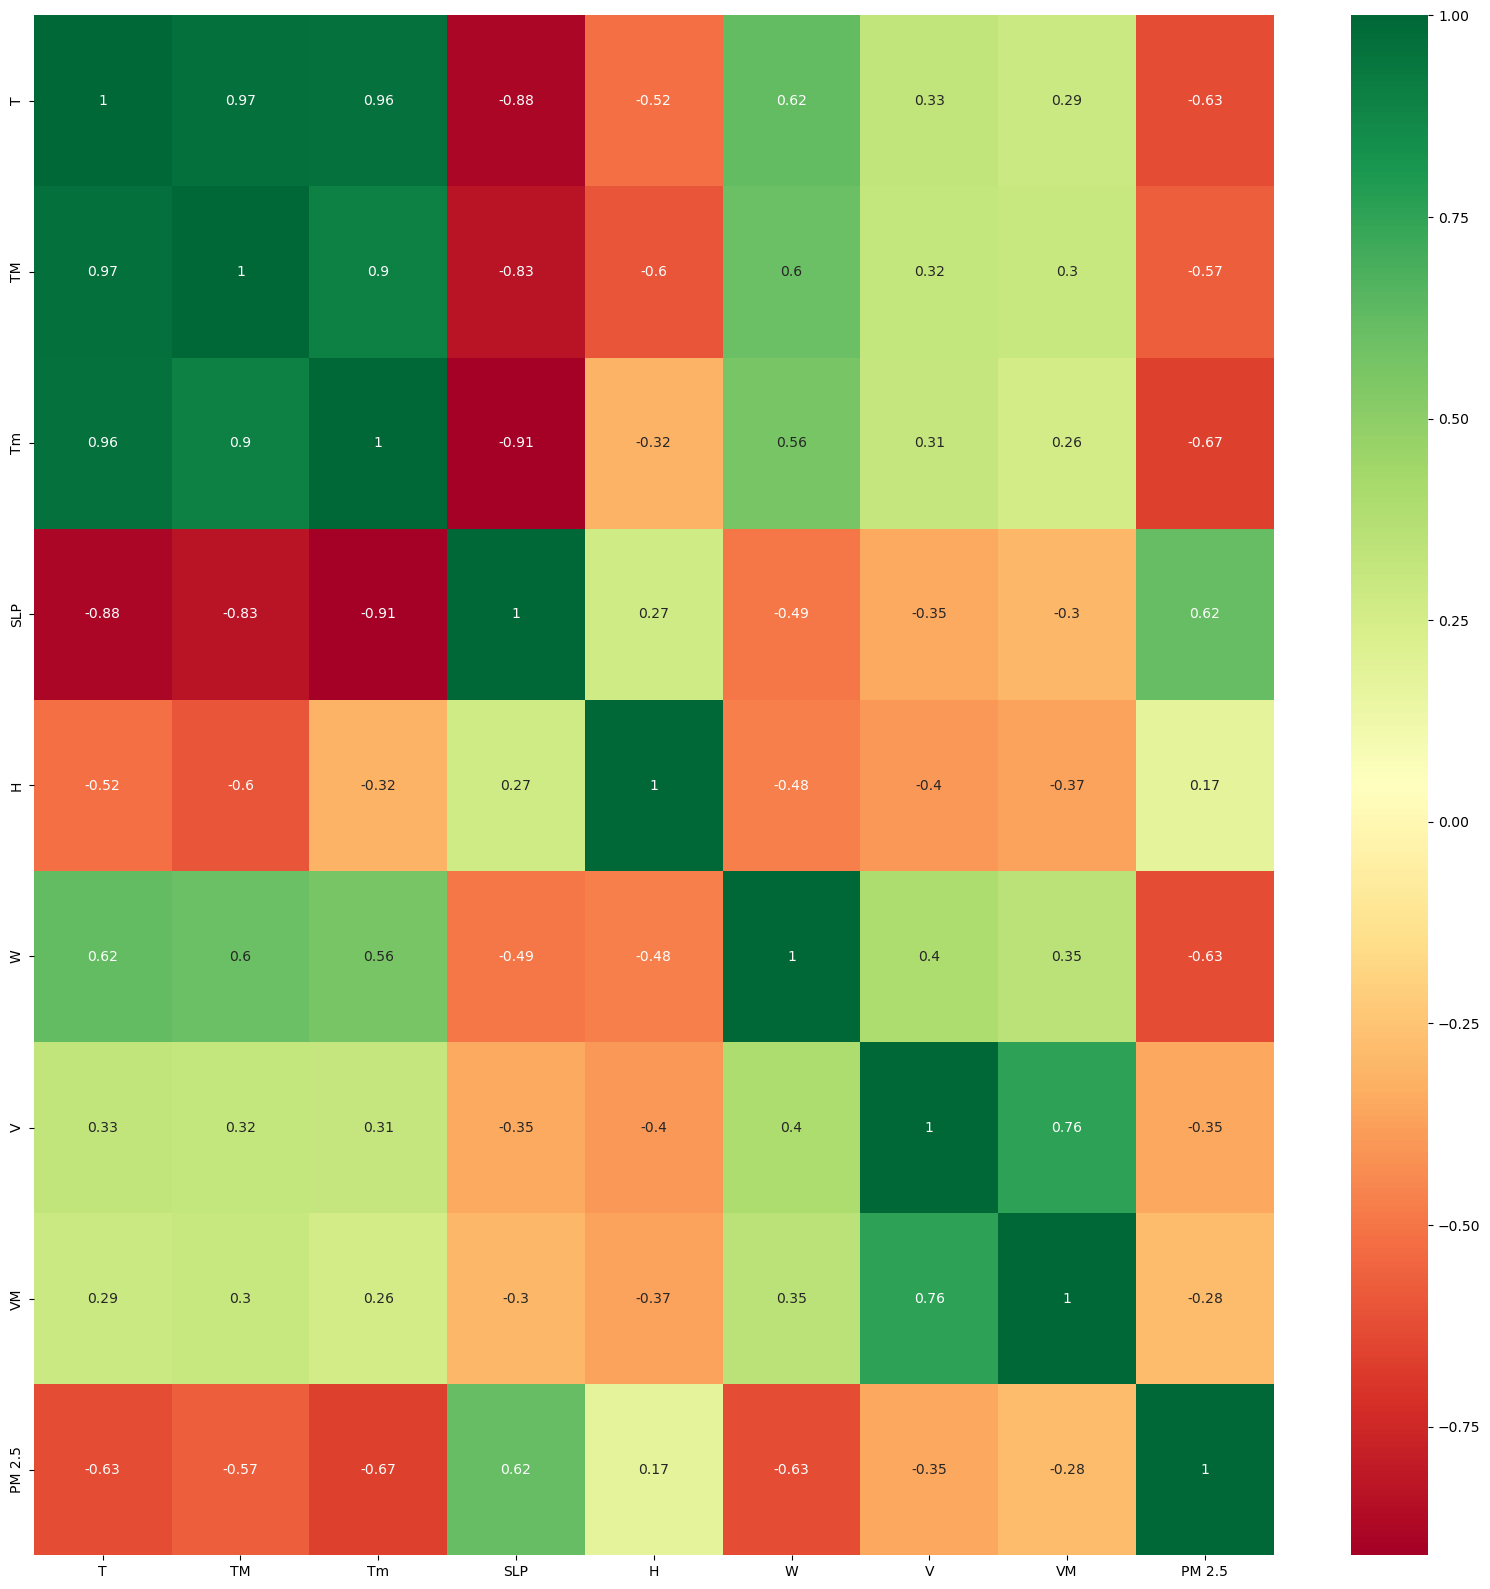

In [13]:
import seaborn as sns
correlation_matrix = df.corr()
top_cor_features = correlation_matrix.index
plt.figure(figsize=(20, 20))
#plot heat map
sns.heatmap(df[top_cor_features].corr(), annot = True, cmap = 'RdYlGn')

In [14]:
df.corr().index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'W', 'V', 'VM', 'PM 2.5'], dtype='object')

## Feature Importance ##
We can obtain the importance of each feature of our dataset by using the 'feature importance property' of the model.
The feature importance gives us a score for each feature of the data. The higher the score, the more relevant that feature towards the dependent feature.
Feature importance is an inbuilt class that is included in the Tree Based Regressor. We will be using the Extra Tree Regressor for retrieving the top 10 features

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [16]:
print(model.feature_importances_)


[0.18078219 0.09363267 0.16451781 0.12805938 0.08364727 0.25763065
 0.05182731 0.03990271]


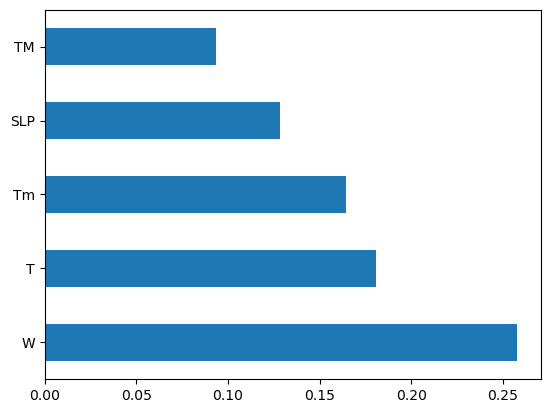

In [17]:
#plot the graph of feature importances to get which features are most important
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(5).plot(kind = 'barh')
plt.show()

## KNN Regression ##

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_68213/2063008122.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y) #right skewed distribution graph


<Axes: xlabel='PM 2.5', ylabel='Density'>

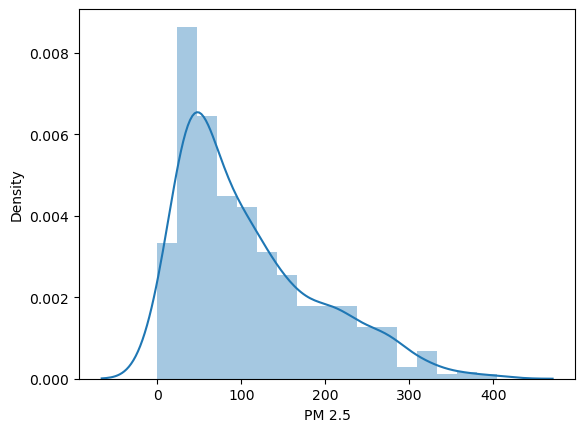

In [18]:
sns.distplot(y) #right skewed distribution graph

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

## KNN Regressor ##

In [20]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [21]:
print("R2 score on train set:" , knn.score(X_train, y_train))

R2 score on train set: 1.0


In [22]:
print("R2 score on test set:" , knn.score(X_test, y_test))


R2 score on test set: -0.08045200427243504


In [24]:
from sklearn.model_selection import cross_val_score #cross validation helps with different combinations of training and test sets
score = cross_val_score(knn, X, y, cv = 5) #5 iterations
score.mean()

-0.12260548546487755

### Model Evaluation ##

In [25]:
prediction = knn.predict(X_test)

/var/folders/qf/7j3lvnwx0xn_ltwl3rkzpt_w0000gn/T/ipykernel_68213/2921611351.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction) #This almost looks like a bell curve - this is good news!


<Axes: xlabel='PM 2.5', ylabel='Density'>

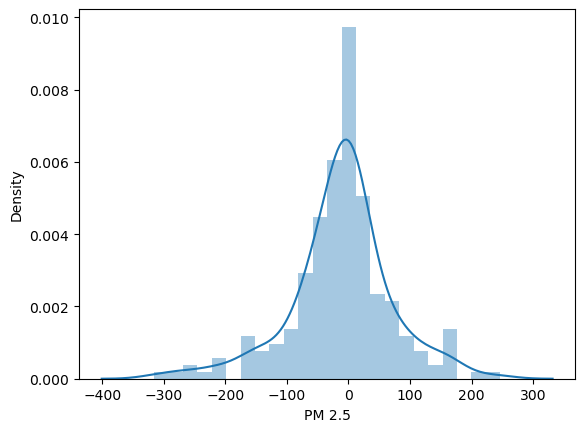

In [26]:
sns.distplot(y_test-prediction) #This almost looks like a bell curve - this is good news!

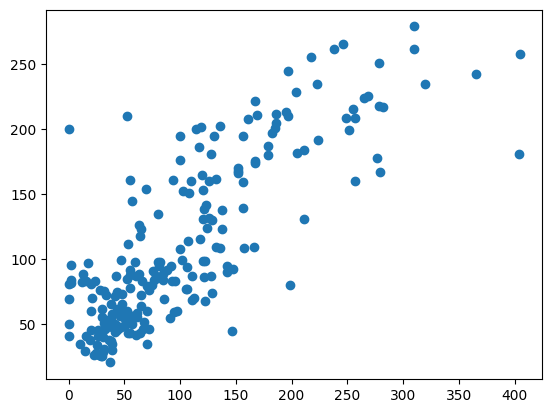

In [36]:
plt.scatter(y_test, prediction)

## Hyperparameter Tuning ##

In [30]:
accuracy_rate = []
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

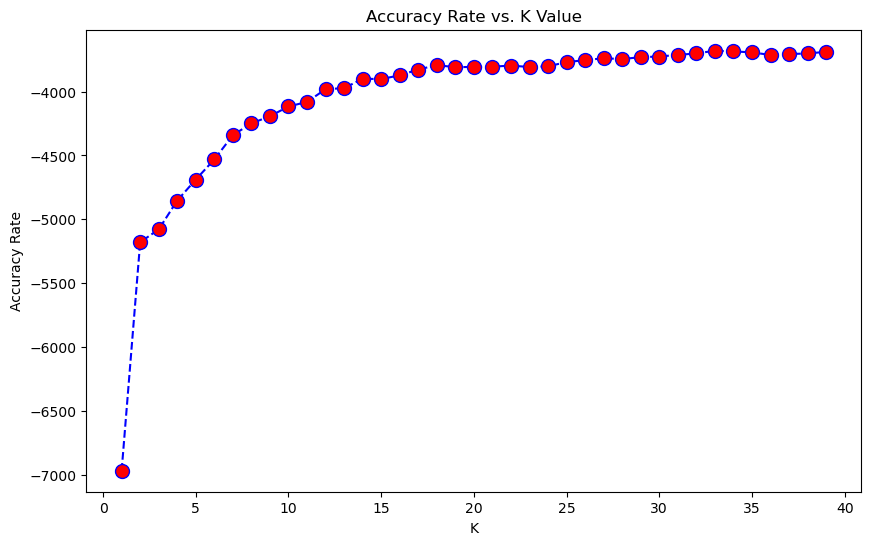

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value') #k-value is number of neighbors
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

## Regression Evaluation Metrics ##
The following are the 3 common evaluation metrics for regression problems:
1. Mean Absolute Error (MAE): This is the mean of the absolute value of errors
2. Mean Squared Error (MSE): This is the mean of the squared errors
3. Root Mean Squared Error (RMSE): This is the root of the mean of the squared errors

Comparing the above 3:
1. MAE is the easiest to understand because it is the average of the errors.
2. MSE is more popular than MAE because it punishes large errors, which is helpful in the real world.
3. RMSE is even more popular than MSE, because it is interpretable in "y" units

All these evaluation metrics are loss functions because we want to minimize them.

In [33]:
from sklearn import metrics
print("MAE: ", metrics.mean_absolute_error(y_test, prediction))
print("MSE: ", metrics.mean_squared_error(y_test, prediction))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, prediction)))
#This performs the worst here!

MAE:  57.635540334855406
MSE:  7053.356899257989
RMSE:  83.98426578388353


In [51]:
import pickle #using for deployment

In [52]:
# open a file, where you ant to store the data
file = open('knn.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random_grid, file)